In [45]:
import pandas as pd 
import numpy as np 

In [46]:
df = pd.read_csv('golf_df.csv')
df

,Outlook,Temperature,Humidity,Windy,Play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [47]:
df['Outlook'].unique()

array(['sunny', 'overcast', 'rainy'], dtype=object)

In [48]:
df['Temperature'].unique()

array(['hot', 'mild', 'cool'], dtype=object)

In [49]:
df['Humidity'].unique()

array(['high', 'normal'], dtype=object)

In [21]:
df['Windy'].unique()

array([False,  True])

In [50]:
df['Play'].unique()

array(['no', 'yes'], dtype=object)

In [51]:
df['Outlook'] = df['Outlook'].replace( {'sunny' : 0 , 'overcast':1 , 'rainy':2 } )
df['Temperature'] = df['Temperature'].replace({'hot':0, 'mild':1, 'cool':2})
df['Humidity'] = df['Humidity'].replace({'high':0, 'normal':1})
df['Windy'] = df["Windy"].replace({False:0,  True:1})
df['Play'] = df["Windy"].replace({'no':0, 'yes':1})
df

,Outlook,Temperature,Humidity,Windy,Play
0,0,0,0,0,0
1,0,0,0,1,1
2,1,0,0,0,0
3,2,1,0,0,0
4,2,2,1,0,0
5,2,2,1,1,1
6,1,2,1,1,1
7,0,1,0,0,0
8,0,2,1,0,0
9,2,1,1,0,0


In [34]:
# X = df.iloc[:,0:4]
# y = df.iloc[:,4]


In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [35]:
# X_train , X_test , y_train , y_test = train_test_split(X , y , train_size=0.20 , random_state=0)

In [59]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.fit_transform(X_test)
model = DecisionTreeClassifier()
model.fit(df.iloc[:,0:4] , df.iloc[:,4])

DecisionTreeClassifier()

In [54]:
import matplotlib.pyplot as plt 
from sklearn import tree

[Text(0.5, 0.75, 'X[3] <= 0.5\ngini = 0.49\nsamples = 14\nvalue = [8, 6]'), Text(0.25, 0.25, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'), Text(0.75, 0.25, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]')]


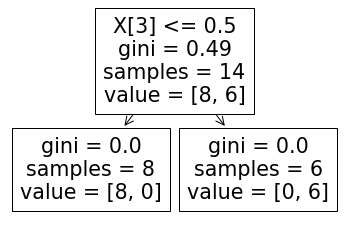

In [60]:
plt.Figure(figsize=(12,8))
print(tree.plot_tree(model))

In [67]:
from sklearn.tree import export_graphviz
features_name = ['Outlook','Temperature','Humidity','Windy']
output = ['yes','no']
dot = export_graphviz(
    model , out_file = 'Golf.dot',
    feature_names = features_name , class_names = output
)